In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# Get constants
with open("params_test.json", 'r') as file:
    params = json.load(file)

agent_name   = params['test']['AGENT_NAME']
model_name   = params['test']['MODEL_NAME']
test_rounds  = params['test']['TEST_ROUNDS']
scenario     = params['test']['SCENARIO']
other_agents = params['test']['OTHER_AGENTS']


# Print test trivia
print(f"Tested 'agent_{agent_name}_{model_name}' in '{scenario}'\n" +
      f"against {len(other_agents)} {other_agents[0]}_agents for {test_rounds} rounds.")

Tested 'agent_h6_coin-hunter2' in 'classic'
against 3 rule_based_agents for 9000 rounds.


## Looking at the training process

### Testing performance

In [3]:
with open("results_test.json", 'r') as file:
    test_results = json.load(file)

In [4]:
# Get total steps
total_steps = 0
round_list = list(test_results['by_round'])
for round_name in round_list:
    round_dict   = test_results['by_round'][round_name]
    total_steps += round_dict['steps']

agent_stats      = test_results['by_agent'][f"agent_{agent_name}"]
number_of_rounds = agent_stats['rounds']

avg_round_length = total_steps / number_of_rounds
print(f"avg_round_length: {avg_round_length:.0f}")

avg_round_length: 338


In [5]:
agent_avg = lambda str: agent_stats[str] / number_of_rounds

def other_agent_avg (str):
    num_opponents = len(other_agents)
    opponent_values = np.zeros(num_opponents)
    for i in range(num_opponents):
        agent_stats = test_results['by_agent'][f"{other_agents[0]}_agent_{i}"]
        opponent_values[i] = agent_stats[str]

    avg_opponent_value = np.mean(opponent_values) / number_of_rounds
    std_oppenent_value = np.std(opponent_values, ddof=1) / number_of_rounds
    return np.array([avg_opponent_value, std_oppenent_value])

In [6]:
# Average values per round
avg_score      = agent_avg('score')
avg_coins      = agent_avg('coins')
avg_kills      = agent_avg('kills')
avg_got_killed = agent_avg('got killed')
avg_suicides   = agent_avg('suicides')
avg_invalid    = agent_avg('invalid')
avg_life_time  = agent_avg('steps')
avg_bombs      = agent_avg('bombs')

In [7]:
# Percentages
pct_got_killed   = avg_got_killed * 100
pct_suicides     = avg_suicides * 100
pct_got_murdered = pct_got_killed - pct_suicides
pct_invalid      = avg_invalid / avg_round_length * 100
pct_life_time    = avg_life_time / avg_round_length * 100
bombs_per_kill   = np.true_divide(avg_bombs, avg_kills, where = avg_kills != 0)

In [8]:
# Average values per round
other_avg_score      = other_agent_avg('score')
other_avg_coins      = other_agent_avg('coins')
other_avg_kills      = other_agent_avg('kills')
other_avg_got_killed = other_agent_avg('got killed')
other_avg_suicides   = other_agent_avg('suicides')
other_avg_invalid    = other_agent_avg('invalid')
other_avg_life_time  = other_agent_avg('steps')
other_avg_bombs      = other_agent_avg('bombs')

In [9]:
# Percentages
other_pct_got_killed   = other_avg_got_killed * 100
other_pct_suicides     = other_avg_suicides * 100
other_pct_got_murdered = np.array([other_pct_got_killed[0] - other_pct_suicides[0], 
                                   np.linalg.norm(np.array([other_pct_got_killed[1], other_pct_suicides[1]]))])
other_pct_invalid      = other_avg_invalid / avg_round_length * 100
other_pct_life_time    = other_avg_life_time / avg_round_length * 100
other_bombs_per_kill   = np.true_divide(other_avg_bombs, other_avg_kills, where = other_avg_kills != 0)

In [10]:
print(f"Results for own agent:")
print(f"average score        : {avg_score:.2f}")
print(f"average coins        : {avg_coins:.2f}")
print(f"average kills        : {avg_kills:.3f}")
print(f"bombs per kill       : {bombs_per_kill:.0f}")
print("")
print(f"percent got killed   : {pct_got_killed:.1f} %")
print(f"percent got murdered : {pct_got_murdered:.1f} %")
print(f"percent suicides     : {pct_suicides:.1f} %")
print(f"percent invalid      : {pct_invalid:.1f} %")
print(f"average life time    : {avg_life_time:.0f}  ({pct_life_time:.1f} %)")


Results for own agent:
average score        : 4.46
average coins        : 3.60
average kills        : 0.172
bombs per kill       : 101

percent got killed   : 62.1 %
percent got murdered : 17.7 %
percent suicides     : 44.4 %
percent invalid      : 2.9 %
average life time    : 213  (62.9 %)


In [11]:
print("Results for other agents:")
print(f"average score        : {other_avg_score[0]:.2f} ± {other_avg_score[1]:.2f}")
print(f"average coins        : {other_avg_coins[0]:.2f} ± {other_avg_coins[1]:.2f}")
print(f"average kills        : {other_avg_kills[0]:.3f} ± {other_avg_kills[1]:.3f}")
print(f"bombs per kill       : {other_bombs_per_kill[0]:.0f} ± {other_bombs_per_kill[1]:.0f}")
print("")
print(f"percent got killed   : {other_pct_got_killed[0]:.1f} ± {other_pct_got_killed[1]:.1f} %")
print(f"percent got murdered : {other_pct_got_murdered[0]:.1f} ± {other_pct_got_murdered[1]:.1f} %")
print(f"percent suicides     : {other_pct_suicides[0]:.1f} ± {other_pct_suicides[1]:.1f} %")
print(f"percent invalid      : {other_pct_invalid[0]:.1f} ± {other_pct_invalid[1]:.1f} %")
print(f"average life time    : {other_avg_life_time[0]:.0f} ± {other_avg_life_time[1]:.0f}  ({other_pct_life_time[0]:.1f} ± {other_pct_life_time[1]:.1f}%)")

Results for other agents:
average score        : 2.99 ± 0.01
average coins        : 1.79 ± 0.01
average kills        : 0.241 ± 0.002
bombs per kill       : 81 ± 74

percent got killed   : 66.5 ± 0.3 %
percent got murdered : 9.5 ± 0.4 %
percent suicides     : 57.0 ± 0.2 %
percent invalid      : 2.2 ± 0.0 %
average life time    : 219 ± 1  (64.6 ± 0.4%)


### Evaluating the trained model

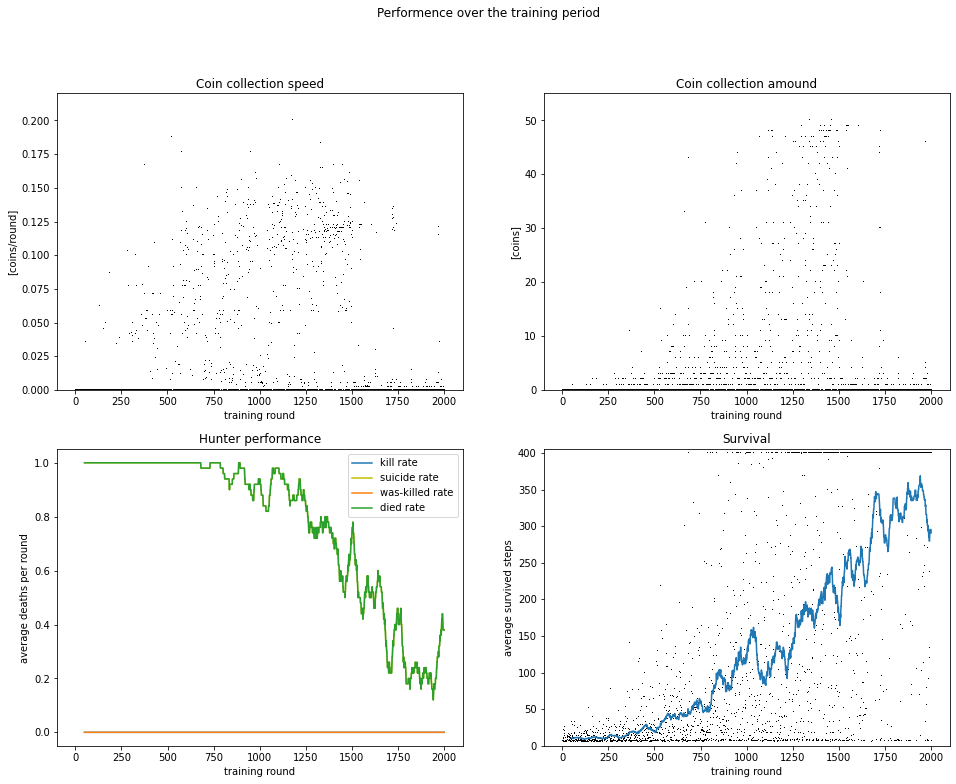

In [14]:
plt.figure(figsize = (16,12))
plt.suptitle("Performence over the training period")

plt.subplot(2, 2, 1)
speed = collected_coins / round_lengths
plt.plot(rounds, speed, ',k')
plt.ylim((0, 1.1*max(speed)))
plt.title("Coin collection speed")
plt.ylabel("[coins/round]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 2)
plt.plot(rounds, collected_coins, ',k')
plt.ylim((0, 1.1*max(collected_coins)))
plt.title("Coin collection amound")
plt.ylabel("[coins]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 3)
plt.plot(rounds[avg_length-1:], kill_rate, label = "kill rate")
plt.plot(rounds[avg_length-1:], suicide_rate, 'y', label = "suicide rate")
plt.plot(rounds[avg_length-1:], was_killed_rate, label = "was-killed rate")
plt.plot(rounds[avg_length-1:], died_rate, label = "died rate")
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Hunter performance")
plt.ylabel("average deaths per round")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(rounds, steps_survived, ',k')
plt.plot(rounds[avg_length-1:], steps_survived_rate)
plt.ylim(0, 405)
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Survival")
plt.ylabel("average survived steps")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.show()



In [4]:
trained_model = np.load(f"model_{agent_name}_{model_name}.npy")
Sa_counter    = np.load(f"sa_counter_{agent_name}_{model_name}.npy")
policy        = np.argmax(trained_model, axis = -1)

In [15]:
def analyze_action():
    title_str = "Evolution of actions"
    
    Q_action = np.mean(allQs, axis = (1,2))
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(number_of_rounds) + 1, Q_action, label = labels)
    plt.title(title_str)
    plt.ylabel("Mean Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

In [16]:
def analyze_state (state):
    state_index, f5 = state
    Q_state = allQs[:, state_index, f5]
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(training_rounds) + 1, Q_state, label = labels)
    plt.title(f"Evolution of policies in state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

In [3]:
# All possible features
all_direction_features = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 2],
        [0, 0, 1, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [0, 0, 2, 2],
        [0, 1, 2, 2],
        [1, 1, 2, 2],
        [0, 2, 2, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],   
    ]
)
all_own_spot_features  = np.array([0, 1, 2])
all_mode_features      = np.array([0, 1, 2])  

In [5]:
def look_up_q_tensor(f5 = 1):
    print(f"Q-Tensor for case (f5 = {f5}):")
    print(f"state  direction features   policy  trained model  {'':20}number of encounters")
    for i in range(len(all_direction_features)):
        line = f"{i:2}{'':2}{all_direction_features[i]} {[f5]}{'':2}{policy[i, f5]}{'':2}["
        for Q_value in trained_model[i, f5]:
            line += f"{Q_value:-7.1f}"
        line += f"]  {np.sum(Sa_counter[i, f5]):5} ["
        for count in Sa_counter[i, f5]:
            line += f" {count:5}"
        line += f"]"
        print(line)

In [6]:
look_up_q_tensor(f5 = 0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [   -6.4   -6.4   -6.3   -6.2   -6.2   -6.3]   2002 [   166   148   181   134  1243   130]
 1  [0 0 0 1] [0]  3  [   -3.9   -5.2   -4.6   44.3   -4.1   -6.0]   1690 [    35    58    35  1471    43    48]
 2  [0 0 1 1] [0]  2  [    0.0    0.0   49.5   -0.6   -0.9   -0.5]    277 [     4     3   260     1     8     1]
 3  [0 1 1 1] [0]  1  [   -0.5    5.0    0.0    0.0    0.0    0.0]      3 [     1     1     0     0     1     0]
 4  [1 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [0]  3  [   -6.8   -6.8   -6.8   44.8   -6.0   -6.8]   4472 [   103    91    99  3996   105    78]
 6  [0 0 1 2] [0]  3  [   -3.3   -3.7   -1.1   48.2   -1.1   -2.1]    571 [    21    10    14   509     9     8]
 7  [0 1 1 2] [0]  3  [    0.0    1.1    0.0   42.1    0.0    0.0]     43 [     1     1  

In [7]:
look_up_q_tensor(f5 = 1)

Q-Tensor for case (f5 = 1):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [1]  0  [   41.2   12.5    5.2   12.2   14.5   18.0]   1532 [  1330    33    57    28    43    41]
 1  [0 0 0 1] [1]  4  [    9.3   -2.5   12.6   23.8   44.8   14.6]   1393 [    41    42    34    44  1189    43]
 2  [0 0 1 1] [1]  4  [   -0.1    3.3    1.1    4.5   47.2    3.6]    249 [     2     2     2     5   236     2]
 3  [0 1 1 1] [1]  2  [    0.0    5.9   45.7    3.9    2.6    7.9]    389 [     4     4   368     3     6     4]
 4  [1 1 1 1] [1]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [1]  3  [   36.5   41.1   41.2   42.2   40.8   37.3]  88604 [   715  2764  2209 42628 39056  1232]
 6  [0 0 1 2] [1]  4  [   39.1   41.5   38.1   39.5   41.8   16.9]  118749 [  3931  4160 52427 26829 30211  1191]
 7  [0 1 1 2] [1]  4  [   44.1   44.7   44.6   43.0   46.2   44.2]  18191 [   153   150 

In [8]:
look_up_q_tensor(f5 = 2)

Q-Tensor for case (f5 = 2):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [2]  4  [    3.7    8.6    8.8    4.9   43.4    5.7]   1168 [    28    43    38    31   999    29]
 1  [0 0 0 1] [2]  5  [   19.3   18.4   23.0   30.9   32.1   37.4]   3651 [   125   101    94   106   341  2884]
 2  [0 0 1 1] [2]  5  [   22.8   22.5   26.4   31.8   13.5   38.7]   3013 [    53    71   131    93   189  2476]
 3  [0 1 1 1] [2]  5  [   10.9   23.5    8.7   14.3   21.2   45.8]   1483 [    24   251    29    61   177   941]
 4  [1 1 1 1] [2]  3  [   27.1   33.7   36.4   42.8   30.2   33.0]   3931 [    32    33    35  3753    50    28]
 5  [0 0 0 2] [2]  3  [    0.0    2.2    0.0    9.2    2.2    0.0]      5 [     0     1     0     3     1     0]
 6  [0 0 1 2] [2]  5  [    4.7    0.0    0.0    0.0    0.0   11.3]     14 [    10     0     0     0     0     4]
 7  [0 1 1 2] [2]  5  [    0.0    0.0    0.0    0.0    0.0    3.5]      1 [     0     0  

### Evolution of the Q-model

In [17]:
allQs = np.load("Qtrain.npy")

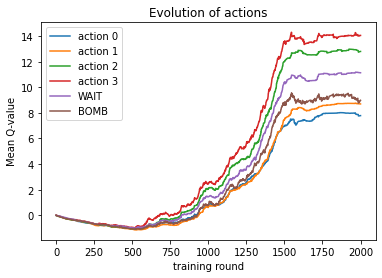

In [18]:
analyze_action()

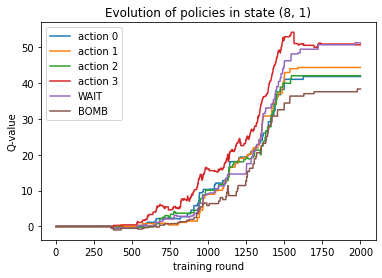

In [19]:
analyze_state((8, 1))

In [20]:
look_up_q_tensor(0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [   -6.4   -6.4   -6.3   -6.2   -6.2   -6.3]   2002 [   166   148   181   134  1243   130]
 1  [0 0 0 1] [0]  3  [   -3.9   -5.2   -4.6   44.3   -4.1   -6.0]   1690 [    35    58    35  1471    43    48]
 2  [0 0 1 1] [0]  2  [    0.0    0.0   49.5   -0.6   -0.9   -0.5]    277 [     4     3   260     1     8     1]
 3  [0 1 1 1] [0]  1  [   -0.5    5.0    0.0    0.0    0.0    0.0]      3 [     1     1     0     0     1     0]
 4  [1 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [0]  3  [   -6.8   -6.8   -6.8   44.8   -6.0   -6.8]   4472 [   103    91    99  3996   105    78]
 6  [0 0 1 2] [0]  3  [   -3.3   -3.7   -1.1   48.2   -1.1   -2.1]    571 [    21    10    14   509     9     8]
 7  [0 1 1 2] [0]  3  [    0.0    1.1    0.0   42.1    0.0    0.0]     43 [     1     1  